In [1]:
import pandas as pd
import tensorflow as tf

In [4]:
train_set = pd.read_csv(r".\sign_mnist_train.csv")

In [5]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
x_train = train_set.drop("label",axis = 1)

In [7]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_train = train_set["label"]
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
x_train.shape

(27455, 784)

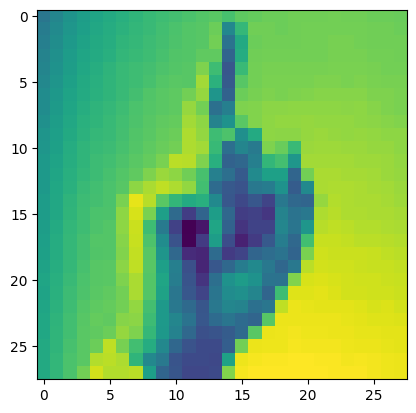

In [11]:
import numpy as np
plt.imshow(np.array(x_train.iloc[0]).reshape(28,28))

In [12]:
y_train.iloc[0]

3

In [13]:
classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
classes[y_train.iloc[0]]

'D'

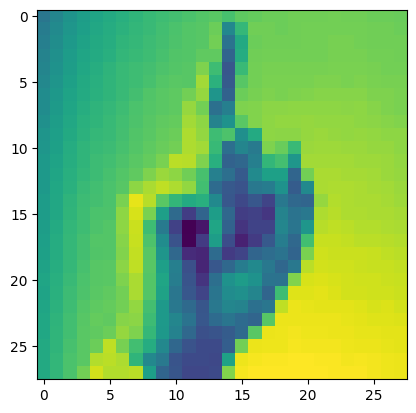

In [14]:
x_train = np.array(x_train).reshape(27455,28,28)
plt.imshow(x_train[0])

In [15]:
from tensorflow import keras
model = keras.Sequential([
    #cnn
    keras.layers.Conv1D(filters=64,kernel_size=(3),activation='relu',input_shape=(28, 28)),
    keras.layers.MaxPooling1D(pool_size=(2)),
    keras.layers.Conv1D(filters=34,kernel_size=(3),activation='relu'),
    keras.layers.MaxPooling1D(pool_size=(2)),

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(250,activation="relu"),
    keras.layers.Dropout(0.30),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(26,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=(["accuracy"]))

In [16]:
y_train = np.array(y_train)
model.fit(x_train,y_train,epochs = 60)

Epoch 1/60


858/858 [==============================] - 15s 12ms/step - loss: 2.9380 - accuracy: 0.1770
Epoch 2/60
858/858 [==============================] - 11s 13ms/step - loss: 1.6724 - accuracy: 0.4467
Epoch 3/60
858/858 [==============================] - 12s 14ms/step - loss: 1.1145 - accuracy: 0.6206
Epoch 4/60
858/858 [==============================] - 12s 14ms/step - loss: 0.8128 - accuracy: 0.7207
Epoch 5/60
858/858 [==============================] - 12s 14ms/step - loss: 0.6199 - accuracy: 0.7903
Epoch 6/60
858/858 [==============================] - 12s 14ms/step - loss: 0.4790 - accuracy: 0.8382
Epoch 7/60
858/858 [==============================] - 12s 13ms/step - loss: 0.3933 - accuracy: 0.8686
Epoch 8/60
858/858 [==============================] - 10s 12ms/step - loss: 0.3481 - accuracy: 0.8839
Epoch 9/60
858/858 [==============================] - 9s 11ms/step - loss: 0.3180 - accuracy: 0.8987
Epoch 10/60
858/858 [==============================] - 9s 11ms/step - loss: 0.279

In [17]:
test_set = pd.read_csv("sign_mnist_test.csv")

In [18]:
test_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [19]:
y_test = np.array(test_set["label"])
y_test


array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [20]:
test_set.shape

(7172, 785)

In [21]:
x_test = np.array(test_set.drop("label",axis =1)).reshape(7172,28,28)

In [22]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 2s 8ms/step - loss: 1.7217 - accuracy: 0.7796


[1.7217150926589966, 0.7795593738555908]

In [23]:
y_predicted =model.predict(x_test)

225/225 [==============================] - 2s 7ms/step


In [32]:
model.save('model_name.h5')

C:\Users\anujb\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [26]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import seaborn as sm
cm=tf.math.confusion_matrix(y_test,y_predicted_labels)
plt.figure(figsize=(10,7))
sm.heatmap(cm,annot=True,fmt="d")
plt.xlabel("prdicted")
plt.ylabel("truth")

ModuleNotFoundError: No module named 'seaborn'